In [1]:
import numpy as np
import matplotlib.pyplot as plt

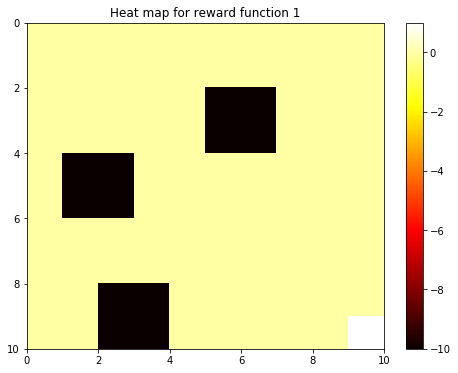

In [2]:
# Q1
N = 10
reward1 = [[0]*N for _ in range(N)]
reward1[9][9] = 1
reward1[2][5:7] = [-10, -10]
reward1[3][5:7] = [-10, -10]
reward1[4][1:3] = [-10, -10]
reward1[5][1:3] = [-10, -10]
reward1[8][2:4] = [-10, -10]
reward1[9][2:4] = [-10, -10]

plt.figure(figsize=(8,6))
plt.title("Heat map for reward function 1")
plt.pcolor(reward1, cmap = 'hot')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

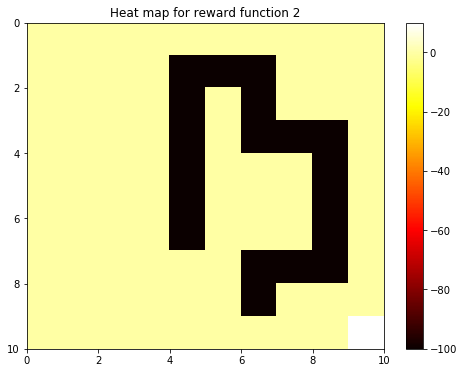

In [3]:
N = 10
reward2 = [[0] * N for _ in range(N)]
reward2[9][9] = 10

reward2[1][4:7] = [-100] * 3
reward2[2][4] = -100
reward2[2][6] = -100
reward2[3][4] = -100
reward2[3][6:9] = [-100] * 3
reward2[4][4] = -100
reward2[4][8] = -100
reward2[5][4] = -100
reward2[5][8] = -100
reward2[6][4] = -100
reward2[6][8] = -100
reward2[7][6:9] = [-100] * 3
reward2[8][6] = -100

plt.figure(figsize=(8,6))
plt.title("Heat map for reward function 2")
plt.pcolor(reward2, cmap = 'hot')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [4]:
# Q2

In [5]:
w = 0.1
gamma = 0.8
thres = 0.01
values = [0 for _ in range(100)]
reward = []
reward1_t = np.array(reward1).transpose()
for lines in reward1_t:
    reward += list(lines)

In [6]:
#corners = [0, 9, 90, 99]
#sides = [1,2,3,4,5,6,7,8,10, 19, 20, 29, 30, 39, 40, 49, 50, 59, 60, 69, 70, 79, 80, 89, 91,92,93,94,95,96,97,98]

up_side = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
left_side = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
right_side = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
down_side = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
out = -2

def transition_prob(curS, nextS, move, w):
    # move 0 -> left, 1 -> up, 2 -> right, 3 -> down
    
    left = curS - 10
    right = curS + 10
    up = curS - 1
    down = curS + 1
    if curS in up_side:
        up = out
    if curS in down_side:
        down = out
    if curS in right_side:
        right = out
    if curS in left_side:
        left = out
    
    if nextS == left:
        if move == 0:
            return 1 - 0.75*w
        else:
            return 0.25*w
    elif nextS == up:
        if move == 1:
            return 1 - 0.75*w
        else:
            return 0.25*w
    elif nextS == right:
        if move == 2:
            return 1 - 0.75*w
        else:
            return 0.25*w
    elif nextS == down:
        if move == 3:
            return 1 - 0.75*w
        else:
            return 0.25*w
    elif nextS == curS:
        record = 0
        if left == out:
            #print("left out")
            if move == 0:
                record += (1 - 0.75*w)
            else:
                record += 0.25*w
        if up == out:
            #print("up out")
            if move == 1:
                record += (1 - 0.75*w)
            else:
                record += 0.25*w
        if right == out:
            #print("right out")
            if move == 2:
                record += (1 - 0.75*w)
            else:
                record += 0.25*w
        if down == out:
            #print("down out")
            if move == 3:
                record += (1 - 0.75*w)
            else:
                record += 0.25*w
        return record
    else:
        return 0
        
    

In [7]:
actions = [-10, -1, 10, 1]
def compute(curS, move, w, gamma, reward, values):
    left = curS + actions[0]
    up = curS + actions[1]
    right = curS + actions[2]
    down = curS + actions[3]
    neighbors = [left, up, right, down, curS]
    result = 0
    for neigh in neighbors:
        if neigh < 0 or neigh > 99 or (curS % 10 == 0 and neigh % 10 == 9) or (curS % 10 == 9 and neigh % 10 == 0):
            continue
        result += transition_prob(curS, neigh, move, w) * (reward[neigh] + gamma * values[neigh])
    return result

In [14]:
def value_iteration(values, w, gamma, reward, threshold, N):
    
    for state in range(100):
        values[state] = 0
    
    delta = float('inf')
    cnt = 0
    while delta > threshold:
        #print(delta)
        if N != 0:
            if cnt >= N:
                break
        cnt += 1
        delta = 0
        temp = values[:]
        for state in range(100):
            v = values[state]
            values[state] = max(compute(state, 0, w, gamma, reward, temp),
                               compute(state, 1, w, gamma, reward, temp),
                               compute(state, 2, w, gamma, reward, temp),
                               compute(state, 3, w, gamma, reward, temp))
            delta = max(delta, abs(v - values[state]))
    return [values, cnt]

In [15]:
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, 0)
print("number of iterations to converge:", cnt)

number of iterations to converge: 22


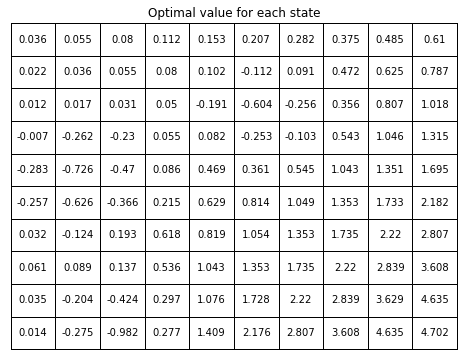

In [16]:
plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

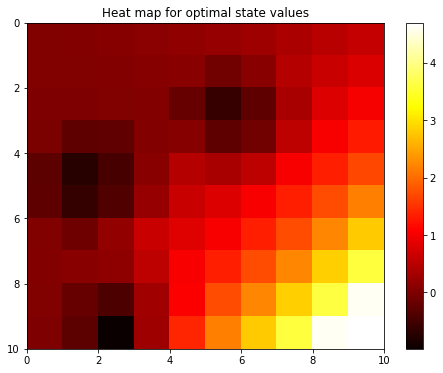

In [17]:
# Q3

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = 'hot')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 4


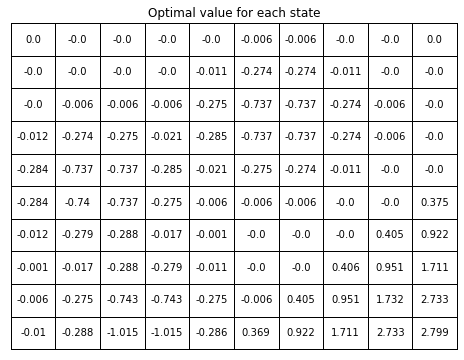

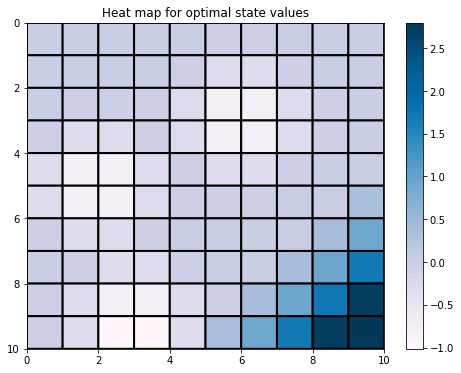

In [12]:
# Q2 N = 4, 8, 12, 16, 20
num_iter = 4
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", num_iter)

plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 8


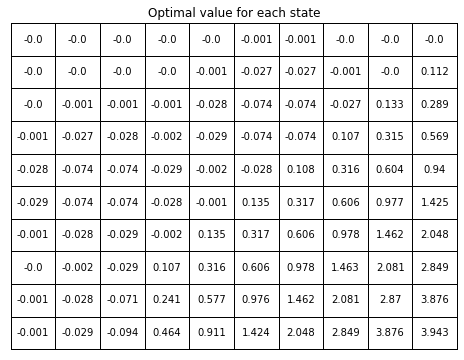

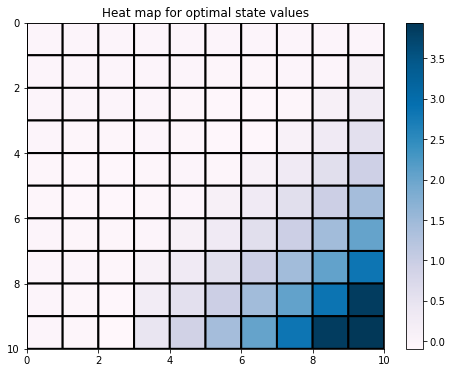

In [13]:
num_iter = 8
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", num_iter)

plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 12


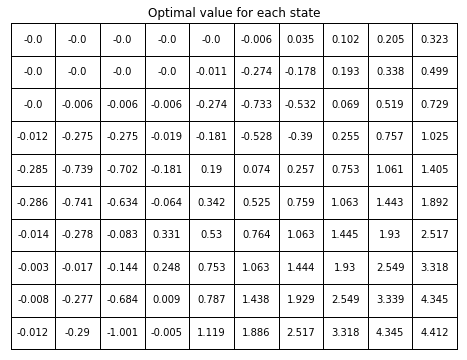

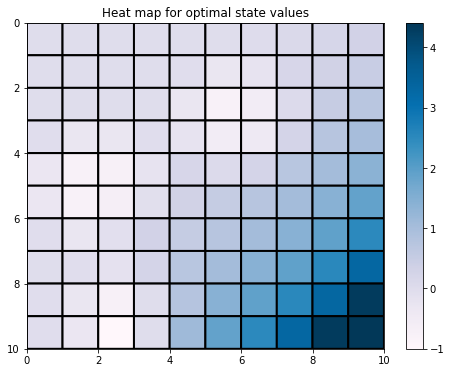

In [44]:
num_iter = 12
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", num_iter)

plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 16


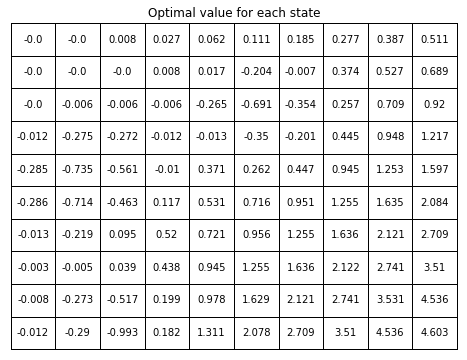

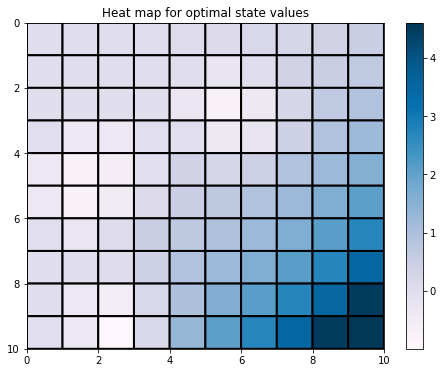

In [45]:
num_iter = 16
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", num_iter)

plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 20


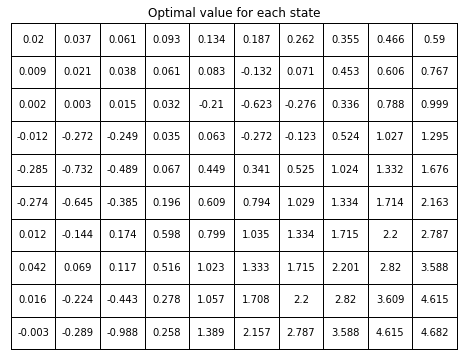

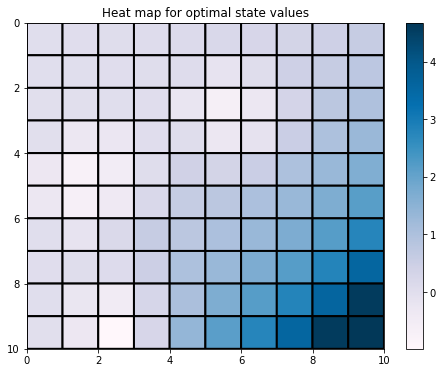

In [46]:
num_iter = 20
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", num_iter)

plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

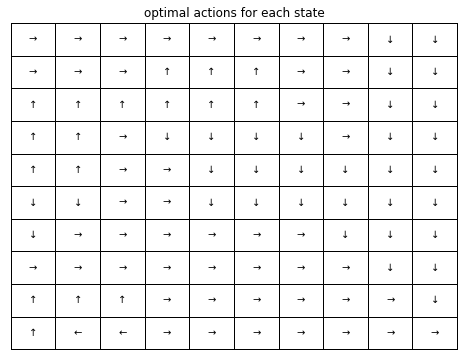

In [18]:
# Q5
acts = [0 for _ in range(100)]
acts_arrow = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    acts[state] = np.argmax([compute(state, 0, w, gamma, reward, values_final),
                            compute(state, 1, w, gamma, reward, values_final),
                            compute(state, 2, w, gamma, reward, values_final),
                            compute(state, 3, w, gamma, reward, values_final)])
    acts_arrow[state] = arrows[acts[state]]

r = reward1
colors = [["" for _ in range(10)] for _ in range(10)]
for i in range(10):
    for j in range(10):
        if r[i][j] == -10:
            colors[i][j] = "y"
        elif r[i][j] == 1:
            colors[i][j] = "#1ac3f5"
        elif r[i][j] == 0:
            colors[i][j] = "w"
    
a1 = np.array(acts_arrow).reshape(10, 10).transpose()
plt.figure(figsize = (8, 6))
plt.title("optimal actions for each state")
tb = plt.table(cellText = a1, loc = (0, 0), cellLoc = 'center')
tc = tb.properties()['child_artists']

for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [40]:
# Q6
w = 0.1
gamma = 0.8
thres = 0.01
values = [0 for _ in range(100)]

reward = []
reward2_t = np.array(reward2).transpose()
for lines in reward2_t:
    reward += list(lines)

In [41]:
[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, 0)
print("number of iterations to converge:", cnt)

number of iterations to converge: 32


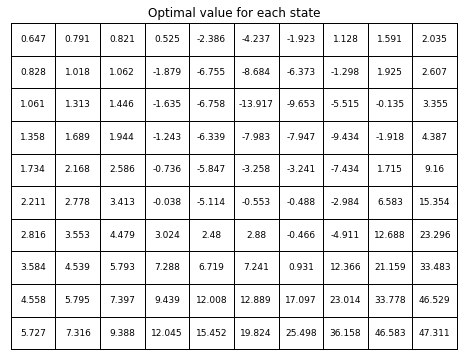

In [42]:
plt.figure(figsize=(8,6))
g2 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()
rows = [i for i in range(10)]
cols = [j for j in range(10)]

tb = plt.table(cellText=g2, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

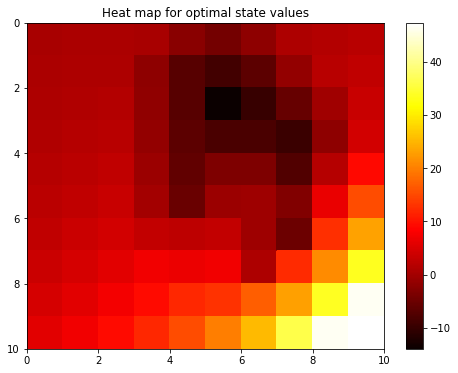

In [44]:
# Q7
plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g2, cmap = 'hot')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 1


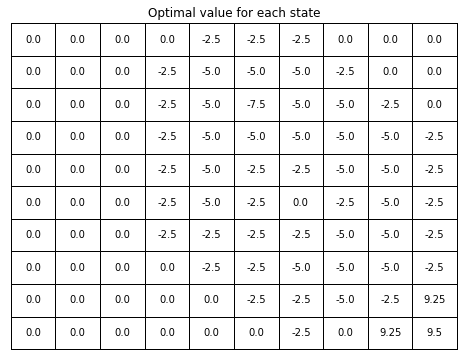

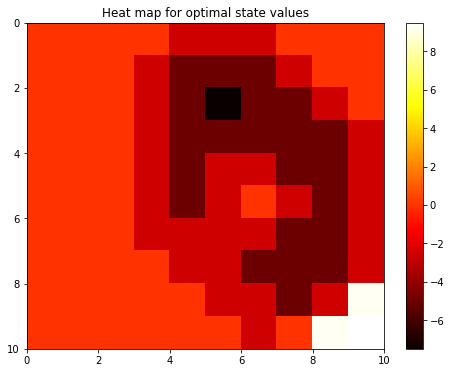

In [45]:
# Q2 N = 6, 12, 18, 24, 30
num_iter = 1
[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", cnt)

plt.figure(figsize=(8,6))
g1 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = 'hot')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 12


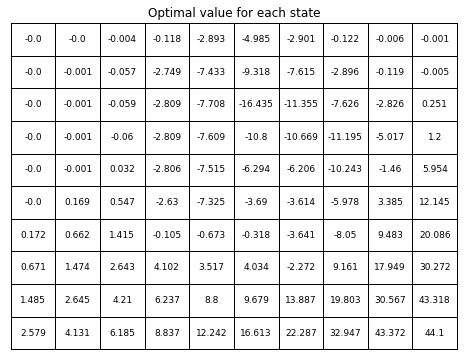

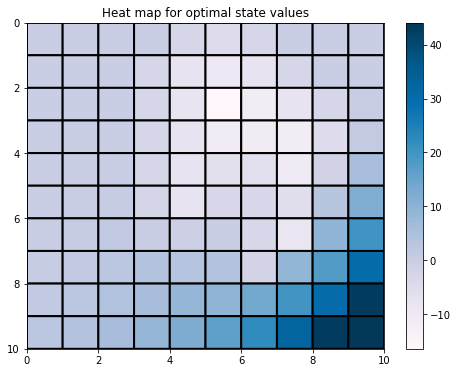

In [22]:
num_iter = 12
[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", cnt)

plt.figure(figsize=(8,6))
g1 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 18


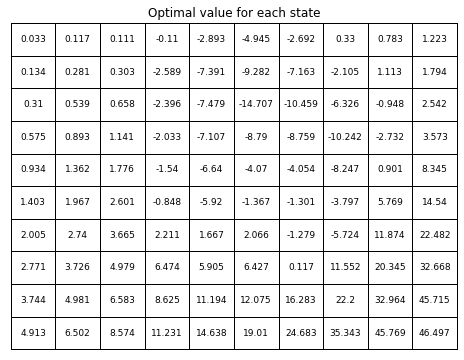

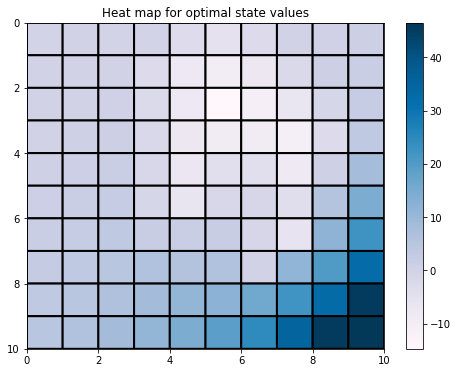

In [23]:
num_iter = 18
[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", cnt)

plt.figure(figsize=(8,6))
g1 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 24


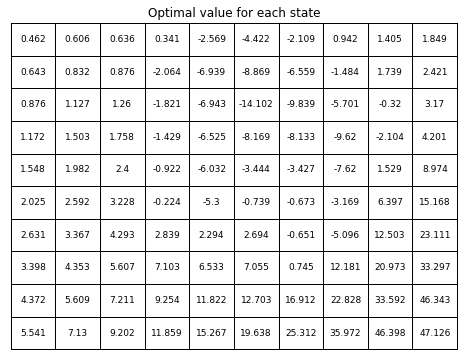

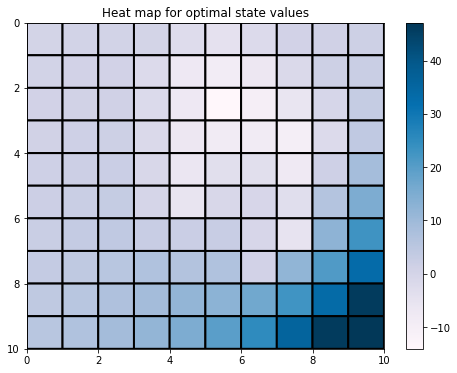

In [56]:
num_iter = 24
[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", cnt)

plt.figure(figsize=(8,6))
g1 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

number of iterations: 30


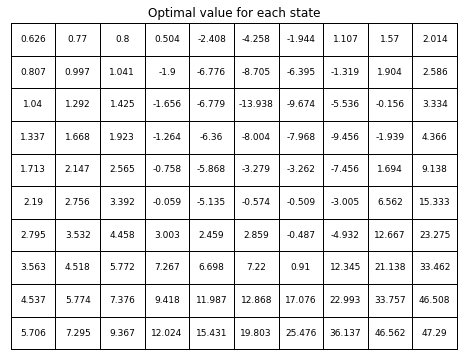

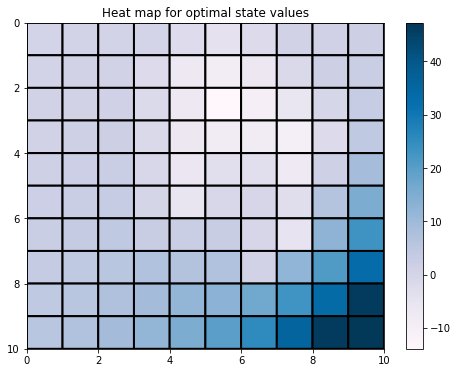

In [57]:
num_iter = 30
[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, num_iter)
print("number of iterations:", cnt)

plt.figure(figsize=(8,6))
g1 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

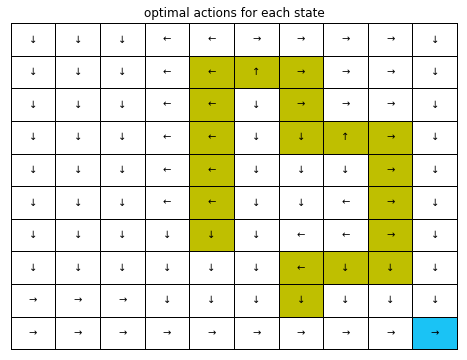

In [21]:
# Q8
acts = [0 for _ in range(100)]
acts_arrow = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    acts[state] = np.argmax([compute(state, 0, w, gamma, reward, values_final2),
                            compute(state, 1, w, gamma, reward, values_final2),
                            compute(state, 2, w, gamma, reward, values_final2),
                            compute(state, 3, w, gamma, reward, values_final2)])
    acts_arrow[state] = arrows[acts[state]]

r = reward2
colors = [["" for _ in range(10)] for _ in range(10)]
for i in range(10):
    for j in range(10):
        if r[i][j] == -100:
            colors[i][j] = "y"
        elif r[i][j] == 10:
            colors[i][j] = "#1ac3f5"
        elif r[i][j] == 0:
            colors[i][j] = "w"

a2 = np.array(acts_arrow).reshape(10, 10).transpose()
plt.figure(figsize = (8, 6))
plt.title("optimal actions for each state")
tb = plt.table(cellText = a2, loc = (0, 0), cellLoc = 'center', cellColours = colors)
tc = tb.properties()['child_artists']

for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Number of iterations to converge:  19


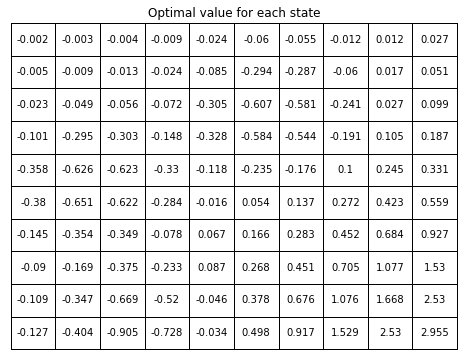

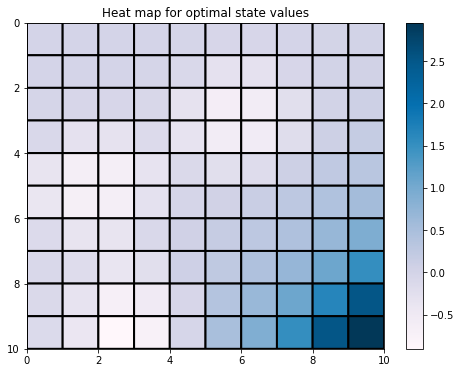

In [48]:
# Q9
# reward function 1

w = 0.6
gamma = 0.8
thres = 0.01
values = [0 for _ in range(100)]
reward = []
reward1_t = np.array(reward1).transpose()
for lines in reward1_t:
    reward += list(lines)
    
[values_final, cnt] = value_iteration(values, w, gamma, reward, thres, 0)
print("Number of iterations to converge: ",cnt)

plt.figure(figsize=(8,6))
g1 = np.round(values_final, decimals=3).reshape(10, 10).transpose()
rows = [i for i in range(10)]
cols = [j for j in range(10)]

tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g1, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()


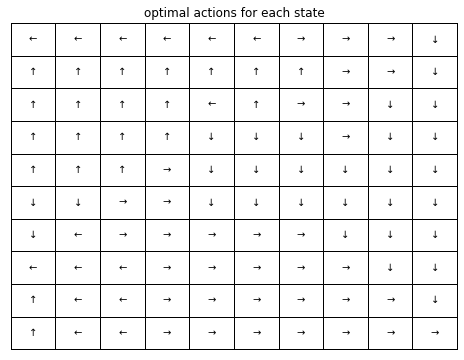

In [50]:
acts = [0 for _ in range(100)]
acts_arrow = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    acts[state] = np.argmax([compute(state, 0, w, gamma, reward, values_final),
                            compute(state, 1, w, gamma, reward, values_final),
                            compute(state, 2, w, gamma, reward, values_final),
                            compute(state, 3, w, gamma, reward, values_final)])
    acts_arrow[state] = arrows[acts[state]]

r = reward1

for i in range(10):
    for j in range(10):
        if r[i][j] == -10:
            colors[i][j] = "y"
        elif r[i][j] == 1:
            colors[i][j] = "#1ac3f5"
        elif r[i][j] == 0:
            colors[i][j] = "w"
    
a1 = np.array(acts_arrow).reshape(10, 10).transpose()
plt.figure(figsize = (8, 6))
plt.title("optimal actions for each state")
tb = plt.table(cellText = a1, loc = (0, 0), cellLoc = 'center')
tc = tb.properties()['child_artists']

for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Number of iterations to converge:  27


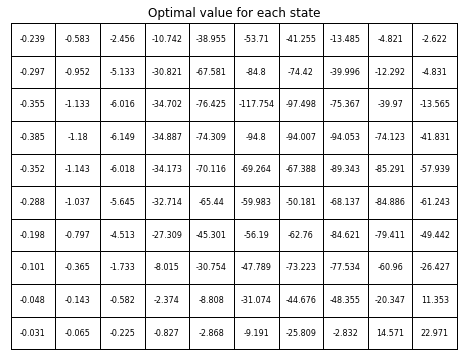

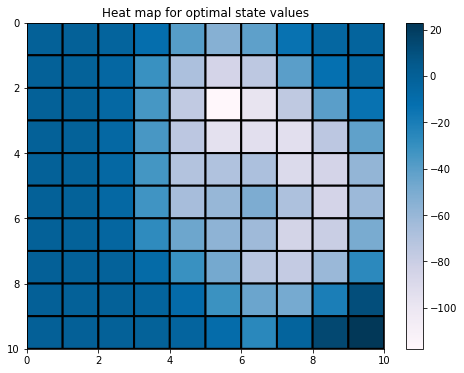

In [51]:
# reward function 2
w = 0.6
gamma = 0.8
thres = 0.01
values = [0 for _ in range(100)]

reward = []
reward2_t = np.array(reward2).transpose()
for lines in reward2_t:
    reward += list(lines)

[values_final2, cnt] = value_iteration(values, w, gamma, reward, thres, 0)
print("Number of iterations to converge: ", cnt)

plt.figure(figsize=(8,6))
g2 = np.round(values_final2, decimals=3).reshape(10, 10).transpose()
rows = [i for i in range(10)]
cols = [j for j in range(10)]

tb = plt.table(cellText=g2, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("Optimal value for each state")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Heat map for optimal state values")
plt.pcolor(g2, cmap = "PuBu", edgecolors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

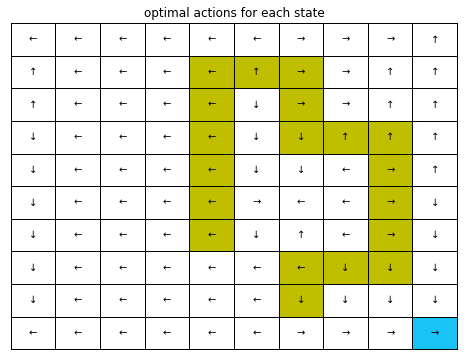

In [29]:
acts = [0 for _ in range(100)]
acts_arrow = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    acts[state] = np.argmax([compute(state, 0, w, gamma, reward, values_final2),
                            compute(state, 1, w, gamma, reward, values_final2),
                            compute(state, 2, w, gamma, reward, values_final2),
                            compute(state, 3, w, gamma, reward, values_final2)])
    acts_arrow[state] = arrows[acts[state]]

r = reward2
colors = [["" for _ in range(10)] for _ in range(10)]
for i in range(10):
    for j in range(10):
        if r[i][j] == -100:
            colors[i][j] = "y"
        elif r[i][j] == 10:
            colors[i][j] = "#1ac3f5"
        elif r[i][j] == 0:
            colors[i][j] = "w"

a2 = np.array(acts_arrow).reshape(10, 10).transpose()
plt.figure(figsize = (8, 6))
plt.title("optimal actions for each state")
tb = plt.table(cellText = a2, loc = (0, 0), cellLoc = 'center', cellColours = colors)
tc = tb.properties()['child_artists']

for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()